#### Objective : This code make use of complaint data against financial companies to perform following tasks on the data
    1. Create Topic models to classify comlplaints in various categories.
    2. We will do test preprcessingw here which remove all token which belong to org and other preprocessing
    3. We will try out two Topic Modelling Algorithms
        1. Latent Dirichtlet ALogorithm - In my exp does not work well on short text data
        2. Non Negative Matrix factorisation

In [ ]:
%%html
<hr style = "height : 2px; background-color: gray;">
<center> <h1> BASIC CERTIFICATION COURSE IN ARTIFICIAL INTELLIGENCE </h1></center>
<center> <h2> Case Study 2 </h2></center>
<center> <h2> Review Comments about Financial Product </h2></center>
<b>Submitted by :Rishabh Gupta</b>
<h4>Dated:28th July 2023
<hr style = "height : 2px; background-color:gray;">

#### About the Dataset
The dataset comprises of Consumer Complaints on Financial products and we’ll see how to classify consumer complaints text into these categories: Debt collection, Consumer Loan, Mortgage, Credit card, Credit reporting, Student loan, Bank account or service, Payday loan, Money transfers, Other financial service, Prepaid card.
Also we will try to identify the companies from the dataset

#### Import the required package

In [ ]:
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import nltk
import spacy
import seaborn as sns
import pickle
from nltk.stem import PorterStemmer
import string

### Read the complaints data csv

In [ ]:
complaint_data = pd.read_csv("../input/consumer-complaints-financial-products/Consumer_Complaints.csv",low_memory = False)

In [ ]:
### Convert the columns names so that they don't have space and are more readable
complaint_data.columns = [i.lower().replace(" ","_").replace("-","_") for i in complaint_data.columns]
complaint_data.columns

Index(['date_received', 'product', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zip_code', 'tags', 'consumer_consent_provided?',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response?', 'consumer_disputed?', 'complaint_id'],
      dtype='object')

### Lets understand the shape an dtypes of the data

In [ ]:
print ("The shape of data is ",complaint_data.shape)
print ("The data types for our data are as follows ")


The shape of data is  (670598, 18)
The data types for our data are as follows 


In [ ]:
### All the varables are text - which may correspond to categories and other variables
print (" The number of unique values in each column is as follows")
### Lets do a describe with including objects
complaint_data.describe(include = 'object').T.reset_index()


 The number of unique values in each column is as follows


,index,count,unique,top,freq
0,date_received,670598,1818,08/27/2015,963
1,product,670598,12,Mortgage,210324
2,sub_product,472396,47,Other mortgage,81715
3,issue,670598,95,"Loan modification,collection,foreclosure",106455
4,sub_issue,269868,68,Account status,32633
5,consumer_complaint_narrative,114704,112690,I am filing this complaint because Experian ha...,102
6,company_public_response,145197,10,Company has responded to the consumer and the ...,57364
7,company,670598,3933,Bank of America,61720
8,state,665293,62,CA,97640
9,zip_code,665274,27889,300XX,2147


######  From above description we see that only 114704 rows have complaint text and as we are interested in only those row which have complaint text. We wll drop all rows where complaint narrative is na

In [ ]:
#### Keep only the consumer complaints is not null
complaint_data = complaint_data[~complaint_data['consumer_complaint_narrative'].isna()]

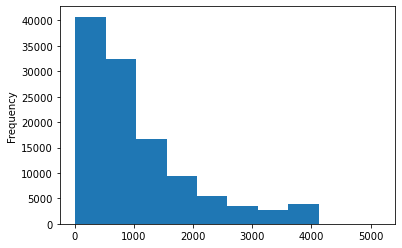

In [ ]:
#### Create a distirbution of length of customers complaints. We have very left skew in length of complaints
### Which is expected as most compalints can be written in less than 500 words
complaint_data['consumer_complaint_narrative'].apply(len).plot(kind = 'hist')

In [ ]:
### Keep the length columns as a new column
complaint_data['comp_length'] = complaint_data['consumer_complaint_narrative'].apply(len)
complaint_data.reset_index(inplace = True)
complaint_data['consumer_complaint_narrative'] = complaint_data['consumer_complaint_narrative'].str.replace(r"XX+\s","")
complaint_data['consumer_complaint_narrative'] = complaint_data['consumer_complaint_narrative'].str.replace("XXXX","")

In [ ]:
complaint_data = complaint_data.sample(frac = 0.5,random_state = 5)
complaint_data.reset_index(inplace = True)

### We will first craete the data processing pipeline to do cleaning on the data

In [ ]:
nlp = spacy.load('en_core_web_sm')
### Remove the stop words using spacy predefined list
stop_words = nlp.Defaults.stop_words
#### Create a list of puntuation to be removed
symbols = " ".join(string.punctuation).split(" ")
### As we are doing topic modelling itsa good idea to do lemmatisation - as it uses morphologial analysis
ps = PorterStemmer()
import re
#### Lets define the cleaning function and see how it works
def cleanup_text(docs,logging = False):
    texts = []
    counter = 1
    for doc in docs:

        if counter % 5000 == 0 :
            print ("Processed %d of out of %d documents"% (counter,len(docs)))
        counter += 1

        doc = nlp(doc) ### We are disabling parser as will nt be using it


        tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != "-PRON-"]

        tokens =[tok for tok in tokens if tok not in symbols]
        tokens = [tok for tok in tokens if tok not in stop_words]
        tokens = [re.sub('[0-9]', '', i) for i in tokens]
        tokens = ' '.join(tokens)
        texts.append(tokens)
    return (pd.Series(texts))

In [ ]:
complaint_data['comp_preprocessed'] = cleanup_text(complaint_data['consumer_complaint_narrative'])

Processed 5000 of out of 57352 documents
Processed 10000 of out of 57352 documents
Processed 15000 of out of 57352 documents
Processed 20000 of out of 57352 documents
Processed 25000 of out of 57352 documents
Processed 30000 of out of 57352 documents
Processed 35000 of out of 57352 documents
Processed 40000 of out of 57352 documents
Processed 45000 of out of 57352 documents
Processed 50000 of out of 57352 documents
Processed 55000 of out of 57352 documents


In [ ]:
print ("Shape of data before removing NA's ,",complaint_data.shape)
complaint_data =complaint_data[~complaint_data['comp_preprocessed'].isna()]
print ("Shape of data before removing NA's ,",complaint_data.shape)

Shape of data before removing NA's , (57352, 22)
Shape of data before removing NA's , (57352, 22)


In [ ]:
complaint_data[['comp_preprocessed','consumer_complaint_narrative']].head(5)

,comp_preprocessed,consumer_complaint_narrative
0,wells fargo need fee waiver issue end want rec...,I called Wells Fargo and I needed fee waiver d...
1,husband purchase mortgage . point gmac mortgag...,In my husband and I purchased a mortgage for t...
2,option cancel credit monitoring service online...,There is NO option for cancelling the credit m...
3,transunion bad incompetent lazy lie company fa...,"Transunion has to be one of the worst, incompe..."
4,complaint submit embrace home loans complaint ...,This is the complaint I am submitting against ...


### Lets tranform the data using TFIDF vectoriser
1. For learning purpose i am using only tf-idf , but inpractical it as advised to trial out count vectoriser also
2. Also, all paarmeters in TF IDF can be treated as Hyperparameters

In [ ]:
### Lets Create the piprle line for NMF models
from time import time

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF
#####  Let extract from act the features from the dataset

print ("Extracting the tf-idf features form NMF")
tfidf_vectorizer = TfidfVectorizer(max_df = 0.5, min_df = 5, max_features = 500, ngram_range = (1,4))

t0 = time()
tfidf = tfidf_vectorizer.fit_transform(complaint_data['comp_preprocessed'])
print ("done in %0.3fs." % (time() - t0))

Extracting the tf-idf features form NMF
done in 76.287s.


In [ ]:
#### Now we will fit model for 10 diff values of clusters
n_comp = [10,20,30,40,50,60,70,80,90,100,110]
loss = []
for comps in n_comp:

    t0 = time()
    nmf = NMF(n_components = comps, random_state = 1, beta_loss = 'kullback-leibler',solver = 'mu',max_iter = 200,
             alpha = 0.1, l1_ratio = 0.5).fit(tfidf)
    loss.append(nmf.reconstruction_err_)
    print ("done in %0.3f " % (time() -t0))

done in 46.818 
done in 64.172 
done in 85.226 
done in 113.229 
done in 146.799 
done in 178.991 
done in 208.497 
done in 257.548 
done in 312.148 
done in 343.540 
done in 470.763 


Text(0, 0.5, 'Reconstruction Error - Frobenius Norm')

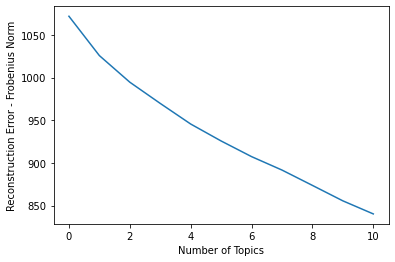

In [ ]:
### Let try to create a elbow and find out the best model clusters
plt.plot(loss)
plt.xlabel('Number of Topics')
plt.ylabel('Reconstruction Error - Frobenius Norm')

### Define a function which goes through - topic * word matrix and extract the top keywords

In [ ]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [ ]:
print_top_words(nmf, tfidf_vectorizer.get_feature_names(), 10)

Topic #0: long way situation end sure time explain good fact finally
Topic #1: report credit credit report account debt report credit account credit collection negative remove credit
Topic #2: xx xx xx xx xx xx xx xx xx xx report credit credit report date debt report credit
Topic #3: account bank checking card checking account bank account debit branch credit card charge
Topic #4: mortgage loan modification payment loan modification home refinance mortgage payment foreclosure servicer
Topic #5: card credit card credit payment limit charge use pay cancel purchase
Topic #6: payment late pay account late payment monthly monthly payment miss month delinquent
Topic #7: wells fargo wells fargo pay credit interest mortgage loss branch rate
Topic #8: loan pay default bank interest student school private afford high
Topic #9: bank america bank america mortgage boa modification foreclosure mortgage payment banking foreclose
Topic #10: tell pay try talk ask money know people come week
Topic #11: 

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
# Fit the NMF model
#### Now we will fit model for 10 diff values of clusters
n_comp = [10,20,30,40,50]

for comps in n_comp:
    loss1 = []
    t0 = time()
    lda = LatentDirichletAllocation(n_components=comps, max_iter=2,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
    lda.fit(tfidf)
    print("done in %0.3fs." % (time() - t0))

done in 59.682s.
done in 58.484s.
done in 60.230s.
done in 62.606s.
done in 64.933s.


In [ ]:
print_top_words(lda, tfidf_vectorizer.get_feature_names(), 10)

Topic #0: charge card balance fee credit card interest pay credit statement cancel
Topic #1: letter court complaint send response case attorney file document cfpb
Topic #2: escrow ocwen mortgage taxis insurance payment pay loan property tax
Topic #3: citi card credit card citibank line mistake transfer balance today thank
Topic #4: card credit card capital credit limit apply use bank open account
Topic #5: delete bad bill mortgage payment minute xx xx xx xx reporting application credit reporting agency response
Topic #6: collection debt agency collection agency validation credit report account send letter
Topic #7: access fund money card withdraw hold system able account bill
Topic #8: lease contract sign agreement early vehicle turn damage agree service
Topic #9: report bankruptcy credit report credit remove remove credit file credit file report credit account
Topic #10: modification loan sale mortgage loan modification home foreclosure payment short sale short
Topic #11: year ago wri